Turning point at time t= 4.035000
Pendulum program could not complete a period, time =10
Exact period = 15.327


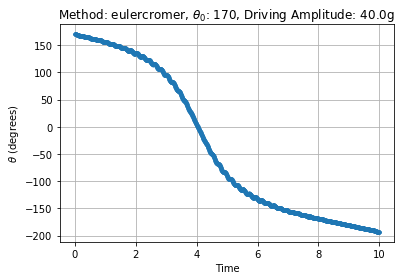

Pendulum program could not complete a period, time =10
Exact period = 15.327


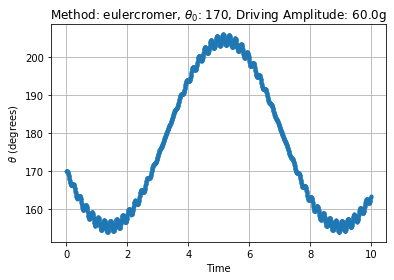

Pendulum program could not complete a period, time =10
Exact period = 15.327


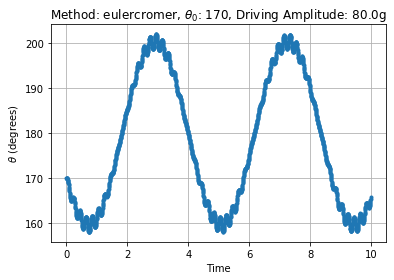

Pendulum program could not complete a period, time =10
Exact period = 15.327


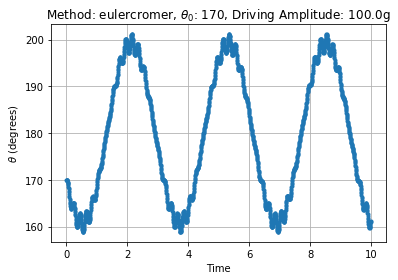

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb  5 11:55:57 2020

@author: akswa
"""

#  Program to compute the motion of a Kapitza’s pendulum
# using the Verlet method


import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk


def period_pend(theta0,g_over_L):
# function to return the exact period for a pendulum of length L
# usage: period = exact_period(theta0,g_over_L)
# where: theta0 = inital angle in degrees
#        g_over_L = ratio g to the length of the pendulum
#        note  -earlier version has a bug as it x sqrt(g/l) not divided 9/11

# note the squaring of the argument in the elliptic function
# matlab uses a different normalization than the book

    period = 4/np.sqrt(g_over_L)*ellipk((np.sin(theta0*np.pi/180./2.))**2)
    return period


def pend(theta0,tau,A0,nstep,NumericalMethod,plotting = False,verbose = False):

    
    # Set initial position and velocity of pendulum
    theta = theta0*np.pi/180  # Convert angle to radians
    omega = 0               # Set the initial velocity
    # Set the physical constants and other variables
    g_over_L = 1            # The constant g/L
    time = 0                # Initial time
    irev = 0                # Used to count number of reversals
    g = 9.81
    L = 9.81
    
    Td = .2 # Driving period (s)
    
    def accel(time,A0,Td,theta,L):
        # The acceleration give by the equation in problem 21
        a_d = A0*np.sin(2*np.pi*time/Td)
        return -((g+a_d)/L)*np.sin(theta)
    
    
    # Take one backward step to start Verlet
    theta_old = theta - omega*tau + 0.5*tau**2*accel(time,A0,Td,theta,L)  
    
    # Loop over desired number of steps with given time step
    #    and numerical method

    # initialize arrays
    t_plot=np.array([])
    th_plot=np.array([])
    period=np.array([])
    

    for istep in range(0,nstep):  
    
        # Record angle and time for plotting
        t_plot = np.append(t_plot,time)            
        th_plot = np.append(th_plot,theta*180/np.pi)   # Convert angle to degrees
        time = time + tau
      
        

       # Compute new position and velocity using Verlet method
        theta_new = 2*theta - theta_old + tau**2*accel(time,A0,Td,theta,L)
        theta_old = theta			   # Verlet method
        theta = theta_new
        
        # Test if the pendulum has passed through theta = 0;
        #    if yes, use time to estimate period
        if theta*theta_old < 0: # Test position for sign change
            if verbose:
                print("Turning point at time t= %f" %time) ;
            if irev == 0:           # If this is the first change,
                time_old = time    # just record the time
            else:
                period = np.append(period,2*(time - time_old))
                time_old = time
            irev = irev + 1       # Increment the number of reversals
    
    if verbose:
        if irev > 1:
            # Estimate period of oscillation, including error bar
            AvePeriod = np.mean(period)
            ErrorBar = np.std(period)/np.sqrt(irev)
            print("Average period = %g +/- %g" %(AvePeriod,ErrorBar))
        else:
            print('Pendulum program could not complete a period, time =%g'%time)
        
        print("Exact period = %g" %period_pend(theta0,g_over_L))
    
    # Graph the oscillations as theta versus time
    if plotting:
        plt.figure(0)
        plt.plot(t_plot,th_plot,'.-')     
        
        plt.title(r"Method: %s, $\theta_0$: %s, Driving Amplitude: %sg" % (NumericalMethod,theta0,A0/9.81) )
        plt.xlabel('Time')
        plt.ylabel(r'$\theta$ (degrees)') # the 'r' means raw strings for latex
        plt.grid()
        plt.show()
    
    return t_plot,th_plot,period


if __name__ == "__main__":
    # Part a
    # Figure 2.7
    g = 9.81

    for i in [40,60,80,100]:
        a,b,c = pend(170,.005,i*g,2000,"eulercromer",plotting = True, verbose = True)